In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Y_GT_X = 1
X_GT_Y = -1
POINT_COUNT = 5

# Generación de puntos
x_range = y_range = (0, 5)
x_lim = y_lim = x_range[1]

split_points = { Y_GT_X: [], X_GT_Y: []}
points_per_class = { Y_GT_X: POINT_COUNT, X_GT_Y: POINT_COUNT }

rng = np.random.default_rng()
klass_pred = { Y_GT_X: '>', X_GT_Y: '<' }

def klass_range(x, klass):
    return (0, x) if klass == X_GT_Y else (x, y_lim)

def generate_points(n, x_range, y_range, klass):
    data = rng.uniform(x_range[0], x_range[1], size=n)
    return list(map(lambda x: (x, rng.uniform(*klass_range(x, klass)), klass), data))

for klass, n in points_per_class.items():
    split_points[klass] = generate_points(n, x_range, y_range, klass)

points = split_points[Y_GT_X] + split_points[X_GT_Y]
df = pd.DataFrame(points, columns=['x', 'y', 'class'])
df.head()

,x,y,class
0,2.599433,3.231587,1
1,2.154353,4.944319,1
2,4.780947,4.800964,1
3,0.862497,1.864989,1
4,2.864128,4.573011,1


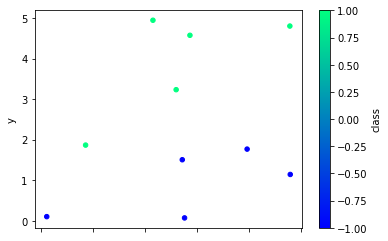

In [82]:
df.plot.scatter('x', 'y', c='class', colormap='winter')
xs = np.linspace(0, 5, 1000)

In [54]:
def calculate_h(w, point):
    return sum([w[j] * point[j] for j in range(0, len(w))])


def calculate_o(h):
    return 1 if h > 0 else -1


def calculate_error(data, w):
    err = 0
    for index, row in data.iterrows():
        h = calculate_h(w, row)
        o = calculate_o(h)
        err += abs(row['class'] - o)
    return err


def get_weights(data, eta=0.1, iterations=1000, stdout=False):
    i = 0
    w = [0 for i in range(len(data.loc[0]) - 1)]
    w_min = w
    error = 1
    error_min = len(df)
    threshold = w[0]  # TODO: ask
    
    while error > 0 and i < iterations:
        random_index = rng.integers(0, len(data))
        point = data.iloc[random_index]
        h = calculate_h(w, point)
        o = calculate_o(h)
        delta_w = eta * (point['class'] - o) * point[0:len(point) - 1]
        w += delta_w
        error = calculate_error(data, w)
        if error < error_min:
            error_min = error
            w_min = w
        
        i += 1
        
        if stdout:
            print(f"error: {error}; point: {list(point)}; h: {h}; o: {o}; delta_w: {list(delta_w)}; w: {list(w)}")
    
    return w_min, error_min

In [55]:
ws, err_m = get_weights(df)
print(f"\n\n\n\n\n{err_m}")
print(ws)






0.0
x   -1.051483
y    1.179323
Name: 5, dtype: float64


0.8915988939355868


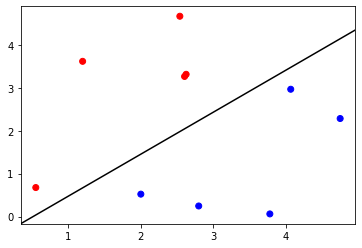

In [56]:
# w1*x + w2*y + b = 0
fig, ax = plt.subplots()
ax.scatter(list(df['x']), list(df['y']), c=list(df['class']), cmap='bwr')
yi = - ws[0] * 0 / ws[1]
yf = - ws[0] * 1 / ws[1]
print(yf)
ax.plot([0, 1], [yi, yf], color='Black', transform=ax.transAxes)

In [57]:
def classify(x, y, w):
    h = calculate_h(w, (x, y))
    o = calculate_o(h)
    return o

print(classify(1, 0.8814770326018851, ws))

-1


In [69]:
# Non-linearly separable dataset

MISMATCH_CLASS_DELTA_Y = 0.5

mismatch_points_per_class = { Y_GT_X: 1, X_GT_Y: 1 }
split_points_2 = { Y_GT_X: [], X_GT_Y: []}

def klass_range_mismatch(x, klass):
    return (x, min(x + MISMATCH_CLASS_DELTA_Y, y_lim)) if klass == X_GT_Y else (x, max(x - MISMATCH_CLASS_DELTA_Y, 0))

def get_klass_range(x, klass, mismatch):
    return klass_range(x, klass) if not mismatch else klass_range_mismatch(x, klass)

def generate_points_non_linear(n, x_range, y_range, klass, mismatch=False):
    data = rng.uniform(x_range[0], x_range[1], size=n)
    return list(map(lambda x: (x, rng.uniform(*get_klass_range(x, klass, mismatch)), klass), data))

for klass, n in points_per_class.items():
    split_points_2[klass] = generate_points_non_linear(n, x_range, y_range, klass)

for klass, n in mismatch_points_per_class.items():
    split_points_2[klass] += generate_points_non_linear(n, x_range, y_range, klass, True)

points_2 = split_points_2[Y_GT_X] + split_points_2[X_GT_Y]
df_2 = pd.DataFrame(points_2, columns=['x', 'y', 'class'])
df_2.head()

,x,y,class
0,0.328249,3.437882,1
1,0.324413,2.970277,1
2,1.795137,2.749072,1
3,0.422075,0.720797,1
4,1.619030,4.456578,1


(0.0, 5.0)

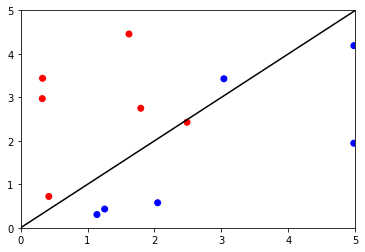

In [70]:
fig, ax = plt.subplots()
ax.scatter(list(df_2['x']), list(df_2['y']), c=list(df_2['class']), cmap='bwr')
ax.plot([0, 1], [0, 1], color='Black', transform=ax.transAxes)
plt.xlim([0, 5])
plt.ylim([0, 5])

In [71]:
ws_2, err_m_2 = get_weights(df_2)
print(f"\n\n\n\n\n{err_m_2}")
print(ws_2)






2.0
x   -3.479420
y    2.508598
Name: 1, dtype: float64


1.3869975534289245


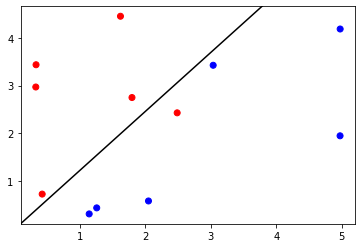

In [72]:
# w1*x + w2*y + b = 0
fig2, ax2 = plt.subplots()
ax2.scatter(list(df_2['x']), list(df_2['y']), c=list(df_2['class']), cmap='bwr')
yi_2 = - ws_2[0] * 0 / ws_2[1]
yf_2 = - ws_2[0] * 1 / ws_2[1]
print(yf_2)
ax2.plot([0, 1], [yi_2, yf_2], color='Black', transform=ax2.transAxes)

In [73]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def get_svm(data):
    X = np.array(list(map(lambda point: (point[0], point[1]), data)))
    y = list(map(lambda point: point[2], data))

    # Create a linear SVM classifier
    clf = SVC(kernel='linear')

    # Train classifier
    clf.fit(X, y)
    
    return X, y, clf

In [86]:
def plot_svm(X, y, clf):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.bwr)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [100]:
def plot_svm2(X, Y, clf):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=80, facecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr)

    plt.xlim([0,5])
    plt.ylim([0,5])
    plt.show()

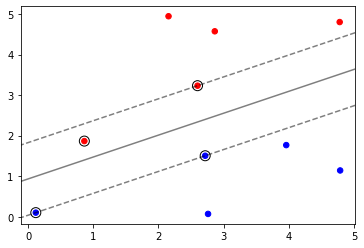

In [87]:
X, y, clf = get_svm(points)
plot_svm(X, y, clf)

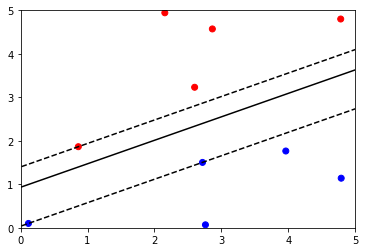

In [101]:
plot_svm2(X, y, clf)

In [38]:
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))